Image scrambling for visual noise style images


Based on multiple online sources


In [64]:
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
import imageio
import random
%matplotlib inline

In [56]:
img = Image.open("images\Alcohol 5.jpg")
print(img.mode, img.size)
plt.imshow(img)

RGB (500, 400)


In [58]:
BLOCKLEN = 4

width, height = img.size

xblock = int(width / BLOCKLEN)
yblock = int(height / BLOCKLEN)
blockmap = [(xb*BLOCKLEN, yb*BLOCKLEN, (xb+1)*BLOCKLEN, (yb+1)*BLOCKLEN)
        for xb in range(xblock) for yb in range(yblock)]

shuffle = list(blockmap)
random.shuffle(shuffle)

result = Image.new(img.mode, (width, height))
for box, sbox in zip(blockmap, shuffle):
    c = img.crop(sbox)
    result.paste(c, box)

<PIL.Image.Image image mode=RGB size=500x400 at 0x20EB578F588>


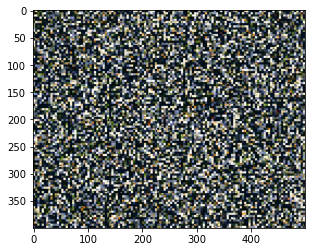

In [66]:
plt.imshow(result)
print(result)

In [67]:
imageio.imwrite("test6.jpg", result)
img = Image.open('test.jpg')
print(img.mode, img.size) #RGBA


# Upto here all test and scratch code.

In [69]:
# File path to load all the files required for processing
mylist = [f for f in glob.glob(r"C:\Users\Ram\OneDrive - University of Sussex\Desktop\LZ correlation\LZ_correlation\images\*.jpg")]
#print(mylist)


# File path where all the files need to be saved in 
final_filepath = r"C:\Users\Ram\OneDrive - University of Sussex\Desktop\LZ correlation\LZ_correlation\noise"

In [74]:
# Set block length as required 
BLOCKLEN = 4

loop_len = range(len(mylist))

for x in loop_len:
    
    img = Image.open(mylist[x])

    width, height = img.size

    xblock = int(width / BLOCKLEN)
    yblock = int(height / BLOCKLEN)
    blockmap = [(xb*BLOCKLEN, yb*BLOCKLEN, (xb+1)*BLOCKLEN, (yb+1)*BLOCKLEN)
            for xb in range(xblock) for yb in range(yblock)]

    shuffle = list(blockmap)
    random.shuffle(shuffle)

    result = Image.new(img.mode, (width, height))
    for box, sbox in zip(blockmap, shuffle):
        c = img.crop(sbox)
        result.paste(c, box)
    final_filename = "%s/%s.jpg" % (final_filepath,x+1)
    imageio.imwrite(final_filename, result)